In this example we consider a non-embeddable example, $𝐾_{1,3}$ (one vertex connected to 3 vertices) with the shortest path metric

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

## Creation of the distance matrix and labels

In [2]:
X = []
nb_per_group = 100

# Middle group
line_group_1 = [0] * nb_per_group + 3 * nb_per_group * [1]

for i in range(nb_per_group):
    X.append(line_group_1)

line_group_2 = [1] * nb_per_group + [0] * nb_per_group + 2 * nb_per_group * [2]
for i in range(nb_per_group):
    X.append(line_group_2)

line_group_3 = (
    [1] * nb_per_group + [2] * nb_per_group + [0] * nb_per_group + nb_per_group * [2]
)
for i in range(nb_per_group):
    X.append(line_group_3)

line_group_4 = [1] * nb_per_group + [2] * nb_per_group * 2 + [0] * nb_per_group
for i in range(nb_per_group):
    X.append(line_group_4)

X = np.array(X, float)
print(X.shape)
# Test if symetric

var = 0.2
rng = np.random.default_rng(seed=42)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if i < j:
            if X[i, j] != X[j, i]:
                raise ValueError("Not symetric")
            rand = rng.normal(loc=0, scale=var)
            temp = X[i, j] + rand
            if temp < 0:
                temp = 0
            X[i, j] = temp
            X[j, i] = temp


# CREATION OF THE REAL LABELS
labels = (
    [0] * nb_per_group + [1] * nb_per_group + [2] * nb_per_group + [3] * nb_per_group
)
np.unique(labels)

(400, 400)


array([0, 1, 2, 3])

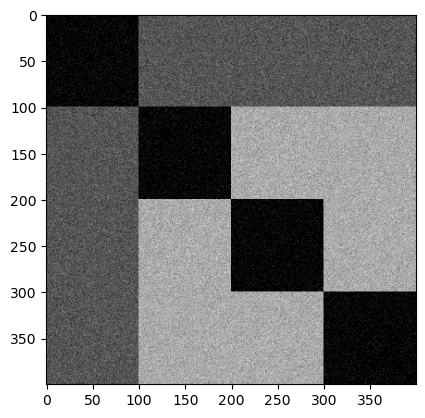

In [3]:
plt.imshow(X, cmap="gray")

## Clustering

In [4]:
from sklearn.cluster import DBSCAN

model_DB = DBSCAN(eps=0.1, min_samples=3, metric="precomputed")
prediction_DB = model_DB.fit_predict(X)
pd.value_counts(prediction_DB)

0    100
1    100
2    100
3    100
dtype: int64

## Creation of ClusterGraph

In [5]:
import clustergraph.clustergraph as cg
from clustergraph.utils import get_clusters_from_scikit
from clustergraph.plot_graph import draw_graph

cluster_g = cg.ClusterGraph(
    X=X,
    metric_points="precomputed",
    clusters=get_clusters_from_scikit(prediction_DB),
    metric_clusters="average",
)

### Set colors

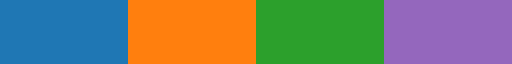

In [6]:
# from tab10
dict_colors = {0: "#1f77b4", 1: "#ff7f0e", 2: "#2ca02c", 3: "#9467bd"}

my_palette = plt.cm.colors.ListedColormap(dict_colors.values())
my_palette

### Plot ClusterGraph

In [7]:
pos = {0: (0, 0), 1: (0.16, 0.99), 2: (-0.94, -0.35), 3: (0.77, -0.63)}

# Coloring the graph
cluster_g.color_graph(
    node_color_labels=prediction_DB,
    node_palette=my_palette,
)

fig, ax = plt.subplots(figsize=(4, 4))
draw_graph(cluster_g.Graph, ax=ax, pos=pos)

AttributeError: 'NodeStrategy' object has no attribute 'get_val_node'

## Dimensionality reduction algorithms

In [ ]:
import umap as um

uma = um.UMAP(n_neighbors=200, metric="precomputed", random_state=42)
X_umap = uma.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, metric="precomputed", init="random", perplexity=200)
X_tnse = tsne.fit_transform(X)

In [ ]:
import phate

phate_operator = phate.PHATE(n_jobs=-2, knn=200)
X_phate = phate_operator.fit_transform(X)

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

draw_graph(cluster_g.Graph, ax=axs[0, 0], pos=pos)

color_points = [dict_colors[p] for p in labels]


axs[0, 0].set_title("(a) ClusterGraph", fontname="serif", family="cmr10", size=18)

axs[0, 1].scatter(X_umap[:, 0], X_umap[:, 1], c=color_points)
axs[0, 1].set_title("(b) UMAP", fontname="serif", family="cmr10", size=18)

axs[1, 0].scatter(X_tnse[:, 0], X_tnse[:, 1], c=color_points)
axs[1, 0].set_title("(c) t-SNE", fontname="serif", family="cmr10", size=18)

axs[1, 1].scatter(X_phate[:, 0], X_phate[:, 1], c=color_points)
axs[1, 1].set_title("(d) PHATE", fontname="serif", family="cmr10", size=18)

plt.tight_layout()
# plt.savefig("impossible.pdf")

## Compare distances between clusters

In [ ]:
from sklearn.metrics import pairwise_distances


def avg_distance_clusters(X):
    centers = [
        [np.average(X[i : i + 100, 0]), np.average(X[i : i + 100, 1])]
        for i in (0, 100, 200, 300)
    ]
    return pairwise_distances(centers)

In [ ]:
avg_distance_clusters(X_umap) / avg_distance_clusters(X_umap)[0, 1]

In [ ]:
avg_distance_clusters(X_tnse) / avg_distance_clusters(X_tnse)[0, 1]

In [ ]:
avg_distance_clusters(X_phate) / avg_distance_clusters(X_phate)[0, 1]